# Projet : analyse de data

### L'économie française peut-elle survivre sans le tourisme ?

Quentin BONNET

Nathan BOUTHORS

Eliott FAYOLLE

Baptiste MICHAUD

Yvon PEREZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('stats_tourisme.csv')
df.head()

: 

Notre étude se base sur les données récupérées sur la page https://ourworldindata.org/tourism.
Nous nous intéressons à la place du tourisme dans l'économie et la culture de 59 pays des 5 continents. Nous avons privilégié les pays les plus peuplés qui comptaient suffisamment de données disponibles.

La liste des pays :

In [ ]:
df['Pays']

,Touristes annuels
Pays,
Albania,6128000.0
Austria,31884000.0
Belgium,9343000.0
Bulgaria,7775000.0
CapeVerde,758000.0


### L'importance du tourisme pour les différents pays du monde

On va regarder si tous les pays ont des caractéristiques similaires vis-à-vis du tourisme.

On trace pour chaque pays le nombre de touristes qui sont venus au cours de l'année 2019 en fonction du nombre d'habitants du pays. L'axe des abscisses (correspondant à la population) est en échelle logarithmique pour améliorer la visibilité.

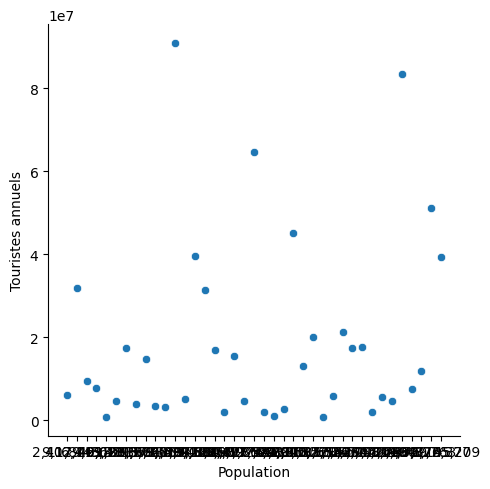

In [ ]:
pays_par_touristes = df.loc[df['Touristes annuels'].notna(), ['Pays', 'Touristes annuels', 'Population']]

graphique = sns.relplot(data = pays_par_touristes, x = 'Population', y = 'Touristes annuels', kind = 'scatter')
graphique.set(xscale="log", xlabel = "Population", ylabel = "Nombre de touristes en 2019", title = "Touristes en fonction de la population par pays")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pays_par_touristes['Population'],pays_par_touristes['Touristes annuels'], pays_par_touristes['Pays'], plt.gca())


On constate que tous les pays ne se valent pas : notamment la France, l'Espagne, l'Italie et les Etats-Unis accueillent beaucoup d'étrangers par rapport à leur nombre d'habitants. Il semblerait donc que le tourisme soit un domaine important pour ces pays.

### Importance économique du tourisme

Comparaison des sommes investies, du nombre d'employés

### Des différences culturelles ?

Comparaison des déplacements à l'étranger par rapport aux déplacements internes au pays (ainsi que les séjours dans les hôtels)